In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load



# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/crop-yield-prediction-dataset/yield.csv
/kaggle/input/crop-yield-prediction-dataset/temp.csv
/kaggle/input/crop-yield-prediction-dataset/rainfall.csv
/kaggle/input/crop-yield-prediction-dataset/pesticides.csv
/kaggle/input/crop-yield-prediction-dataset/yield_df.csv


import all the librarires that we are going to utilize

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder

from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from tensorflow import keras

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, make_scorer

Read CSV file and display head

In [2]:
cropData = pd.read_csv('/kaggle/input/crop-yield-prediction-dataset/yield_df.csv')
print(cropData.head())

   Unnamed: 0     Area         Item  Year  hg/ha_yield  \
0           0  Albania        Maize  1990        36613   
1           1  Albania     Potatoes  1990        66667   
2           2  Albania  Rice, paddy  1990        23333   
3           3  Albania      Sorghum  1990        12500   
4           4  Albania     Soybeans  1990         7000   

   average_rain_fall_mm_per_year  pesticides_tonnes  avg_temp  
0                         1485.0              121.0     16.37  
1                         1485.0              121.0     16.37  
2                         1485.0              121.0     16.37  
3                         1485.0              121.0     16.37  
4                         1485.0              121.0     16.37  


In [3]:
summary = cropData.describe()
print(summary)

         Unnamed: 0          Year    hg/ha_yield  \
count  28242.000000  28242.000000   28242.000000   
mean   14120.500000   2001.544296   77053.332094   
std     8152.907488      7.051905   84956.612897   
min        0.000000   1990.000000      50.000000   
25%     7060.250000   1995.000000   19919.250000   
50%    14120.500000   2001.000000   38295.000000   
75%    21180.750000   2008.000000  104676.750000   
max    28241.000000   2013.000000  501412.000000   

       average_rain_fall_mm_per_year  pesticides_tonnes      avg_temp  
count                    28242.00000       28242.000000  28242.000000  
mean                      1149.05598       37076.909344     20.542627  
std                        709.81215       59958.784665      6.312051  
min                         51.00000           0.040000      1.300000  
25%                        593.00000        1702.000000     16.702500  
50%                       1083.00000       17529.440000     21.510000  
75%                       1

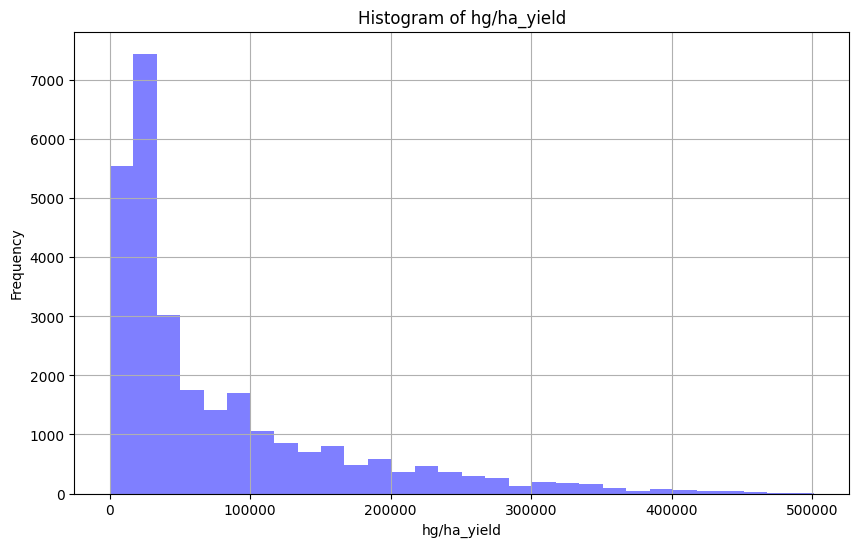

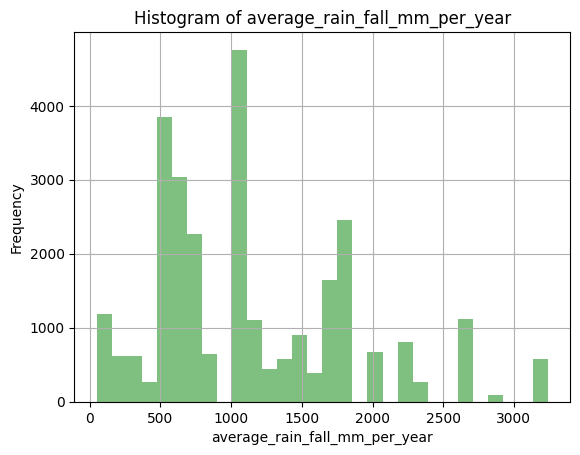

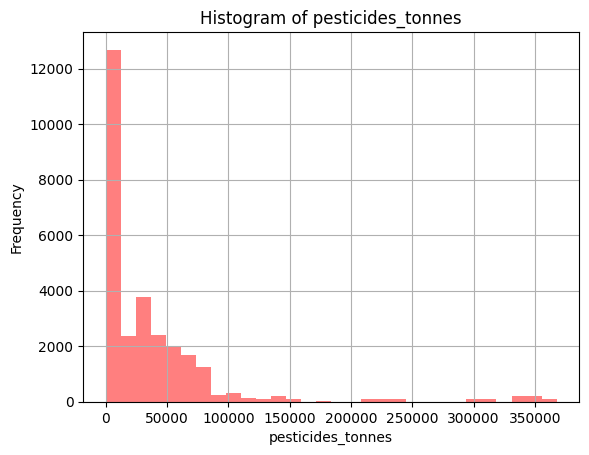

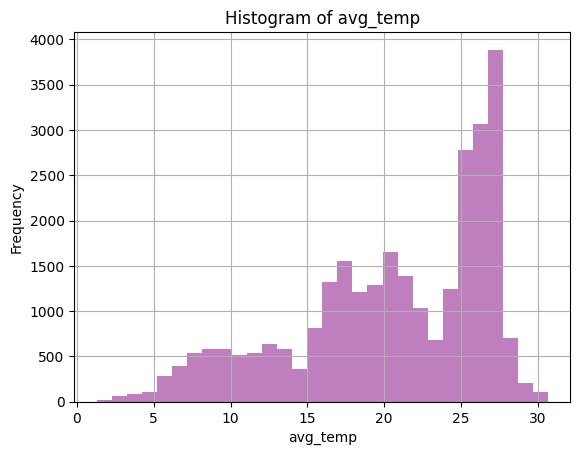

In [6]:
plt.figure(figsize=(10, 6))

# Histograms
cropData['hg/ha_yield'].hist(bins=30, alpha=0.5, color='blue')
plt.title('Histogram of hg/ha_yield')
plt.xlabel('hg/ha_yield')
plt.ylabel('Frequency')
plt.show()



# for average rain fall per year
cropData['average_rain_fall_mm_per_year'].hist(bins=30, alpha=0.5, color='green')
plt.title('Histogram of average_rain_fall_mm_per_year')
plt.xlabel('average_rain_fall_mm_per_year')
plt.ylabel('Frequency')
plt.show()



# for perticides
cropData['pesticides_tonnes'].hist(bins=30, alpha=0.5, color='red')
plt.title('Histogram of pesticides_tonnes')
plt.xlabel('pesticides_tonnes')
plt.ylabel('Frequency')
plt.show()

# for average temperature
cropData['avg_temp'].hist(bins=30, alpha=0.5, color='purple')
plt.title('Histogram of avg_temp')
plt.xlabel('avg_temp')
plt.ylabel('Frequency')
plt.show()

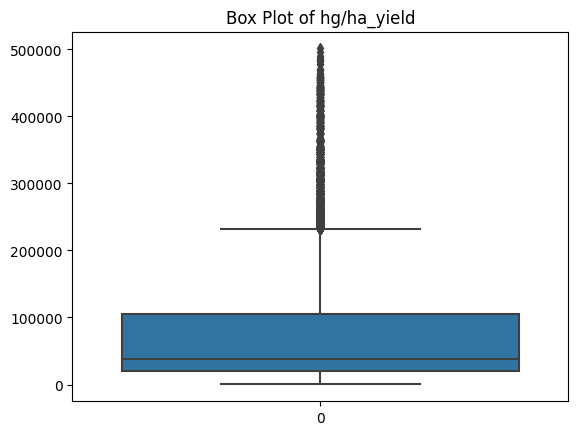

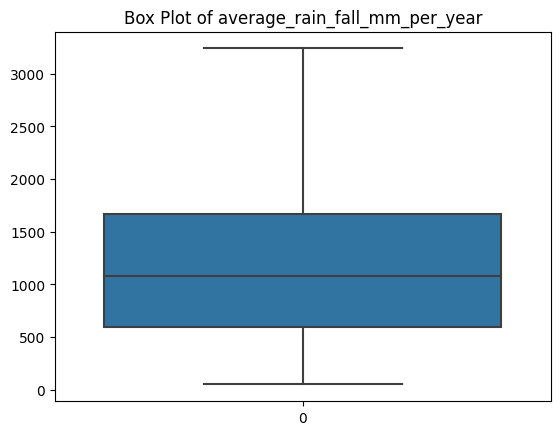

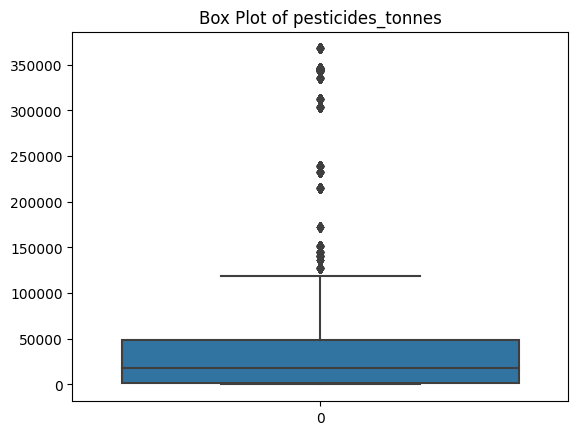

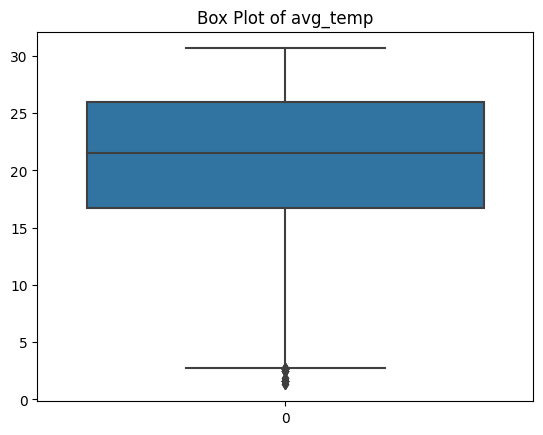

In [7]:
# Box Plots
sns.boxplot(data=cropData['hg/ha_yield'])
plt.title('Box Plot of hg/ha_yield')
plt.show()

sns.boxplot(data=cropData['average_rain_fall_mm_per_year'])
plt.title('Box Plot of average_rain_fall_mm_per_year')
plt.show()

sns.boxplot(data=cropData['pesticides_tonnes'])
plt.title('Box Plot of pesticides_tonnes')
plt.show()

sns.boxplot(data=cropData['avg_temp'])
plt.title('Box Plot of avg_temp')
plt.show()

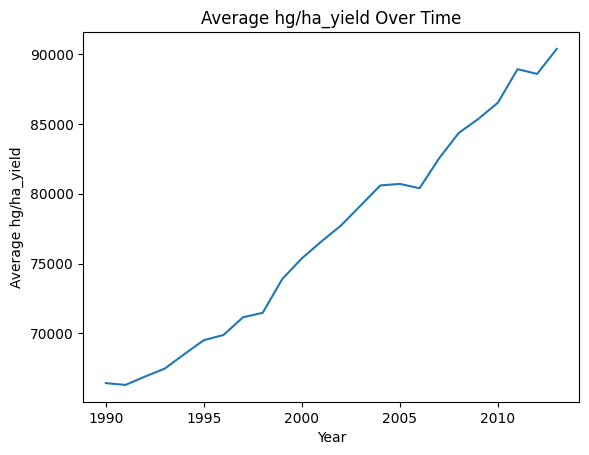

In [8]:
# Time Series Analysis
cropData.groupby('Year')['hg/ha_yield'].mean().plot()
plt.title('Average hg/ha_yield Over Time')
plt.xlabel('Year')
plt.ylabel('Average hg/ha_yield')
plt.show()

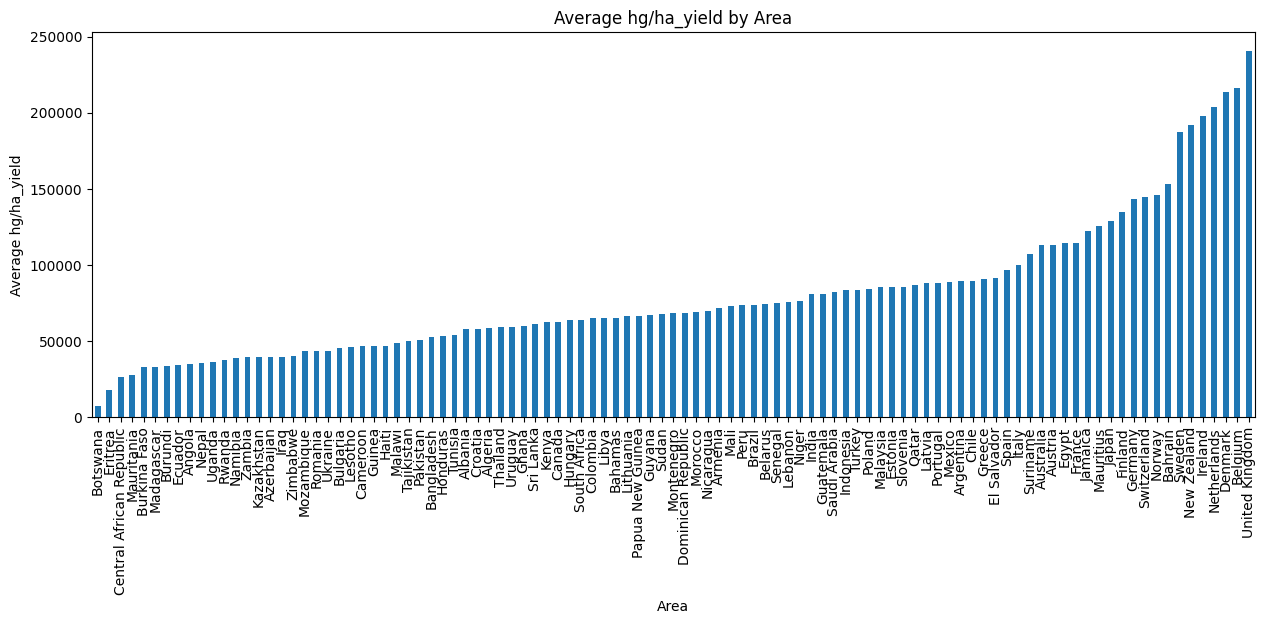

In [9]:
# Area
cropData.groupby('Area')['hg/ha_yield'].mean().sort_values().plot(kind='bar', figsize=(15, 5))
plt.title('Average hg/ha_yield by Area')
plt.xlabel('Area')
plt.ylabel('Average hg/ha_yield')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


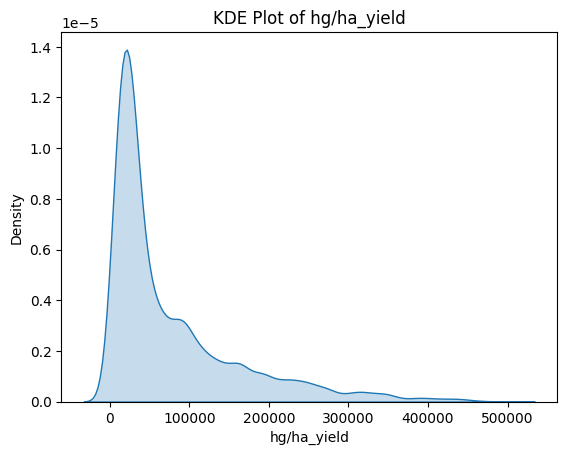

In [10]:
# Distribution Plots
cleaned_data = cropData['hg/ha_yield'].replace([np.inf, -np.inf], np.nan)
sns.kdeplot(cleaned_data, fill=True)
plt.title('KDE Plot of hg/ha_yield')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


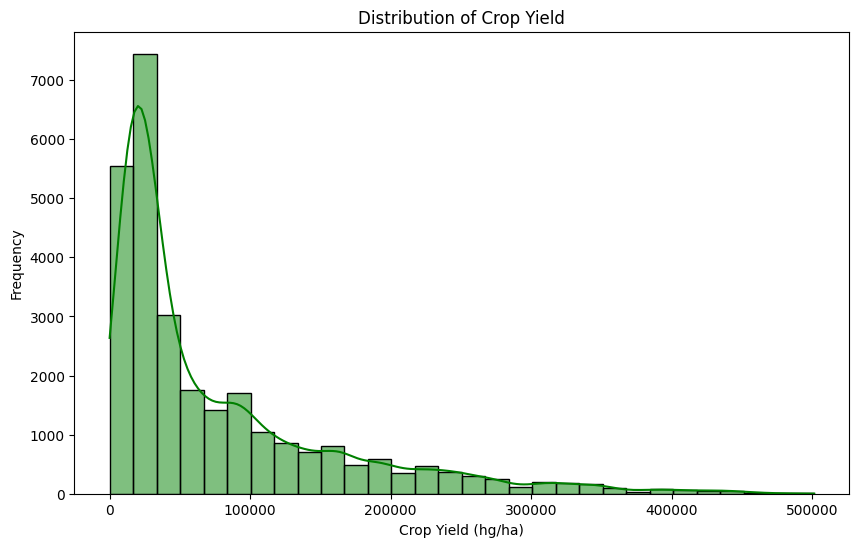

In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(cropData['hg/ha_yield'], bins=30, kde=True, color='green')
plt.title('Distribution of Crop Yield')
plt.xlabel('Crop Yield (hg/ha)')
plt.ylabel('Frequency')
plt.show()

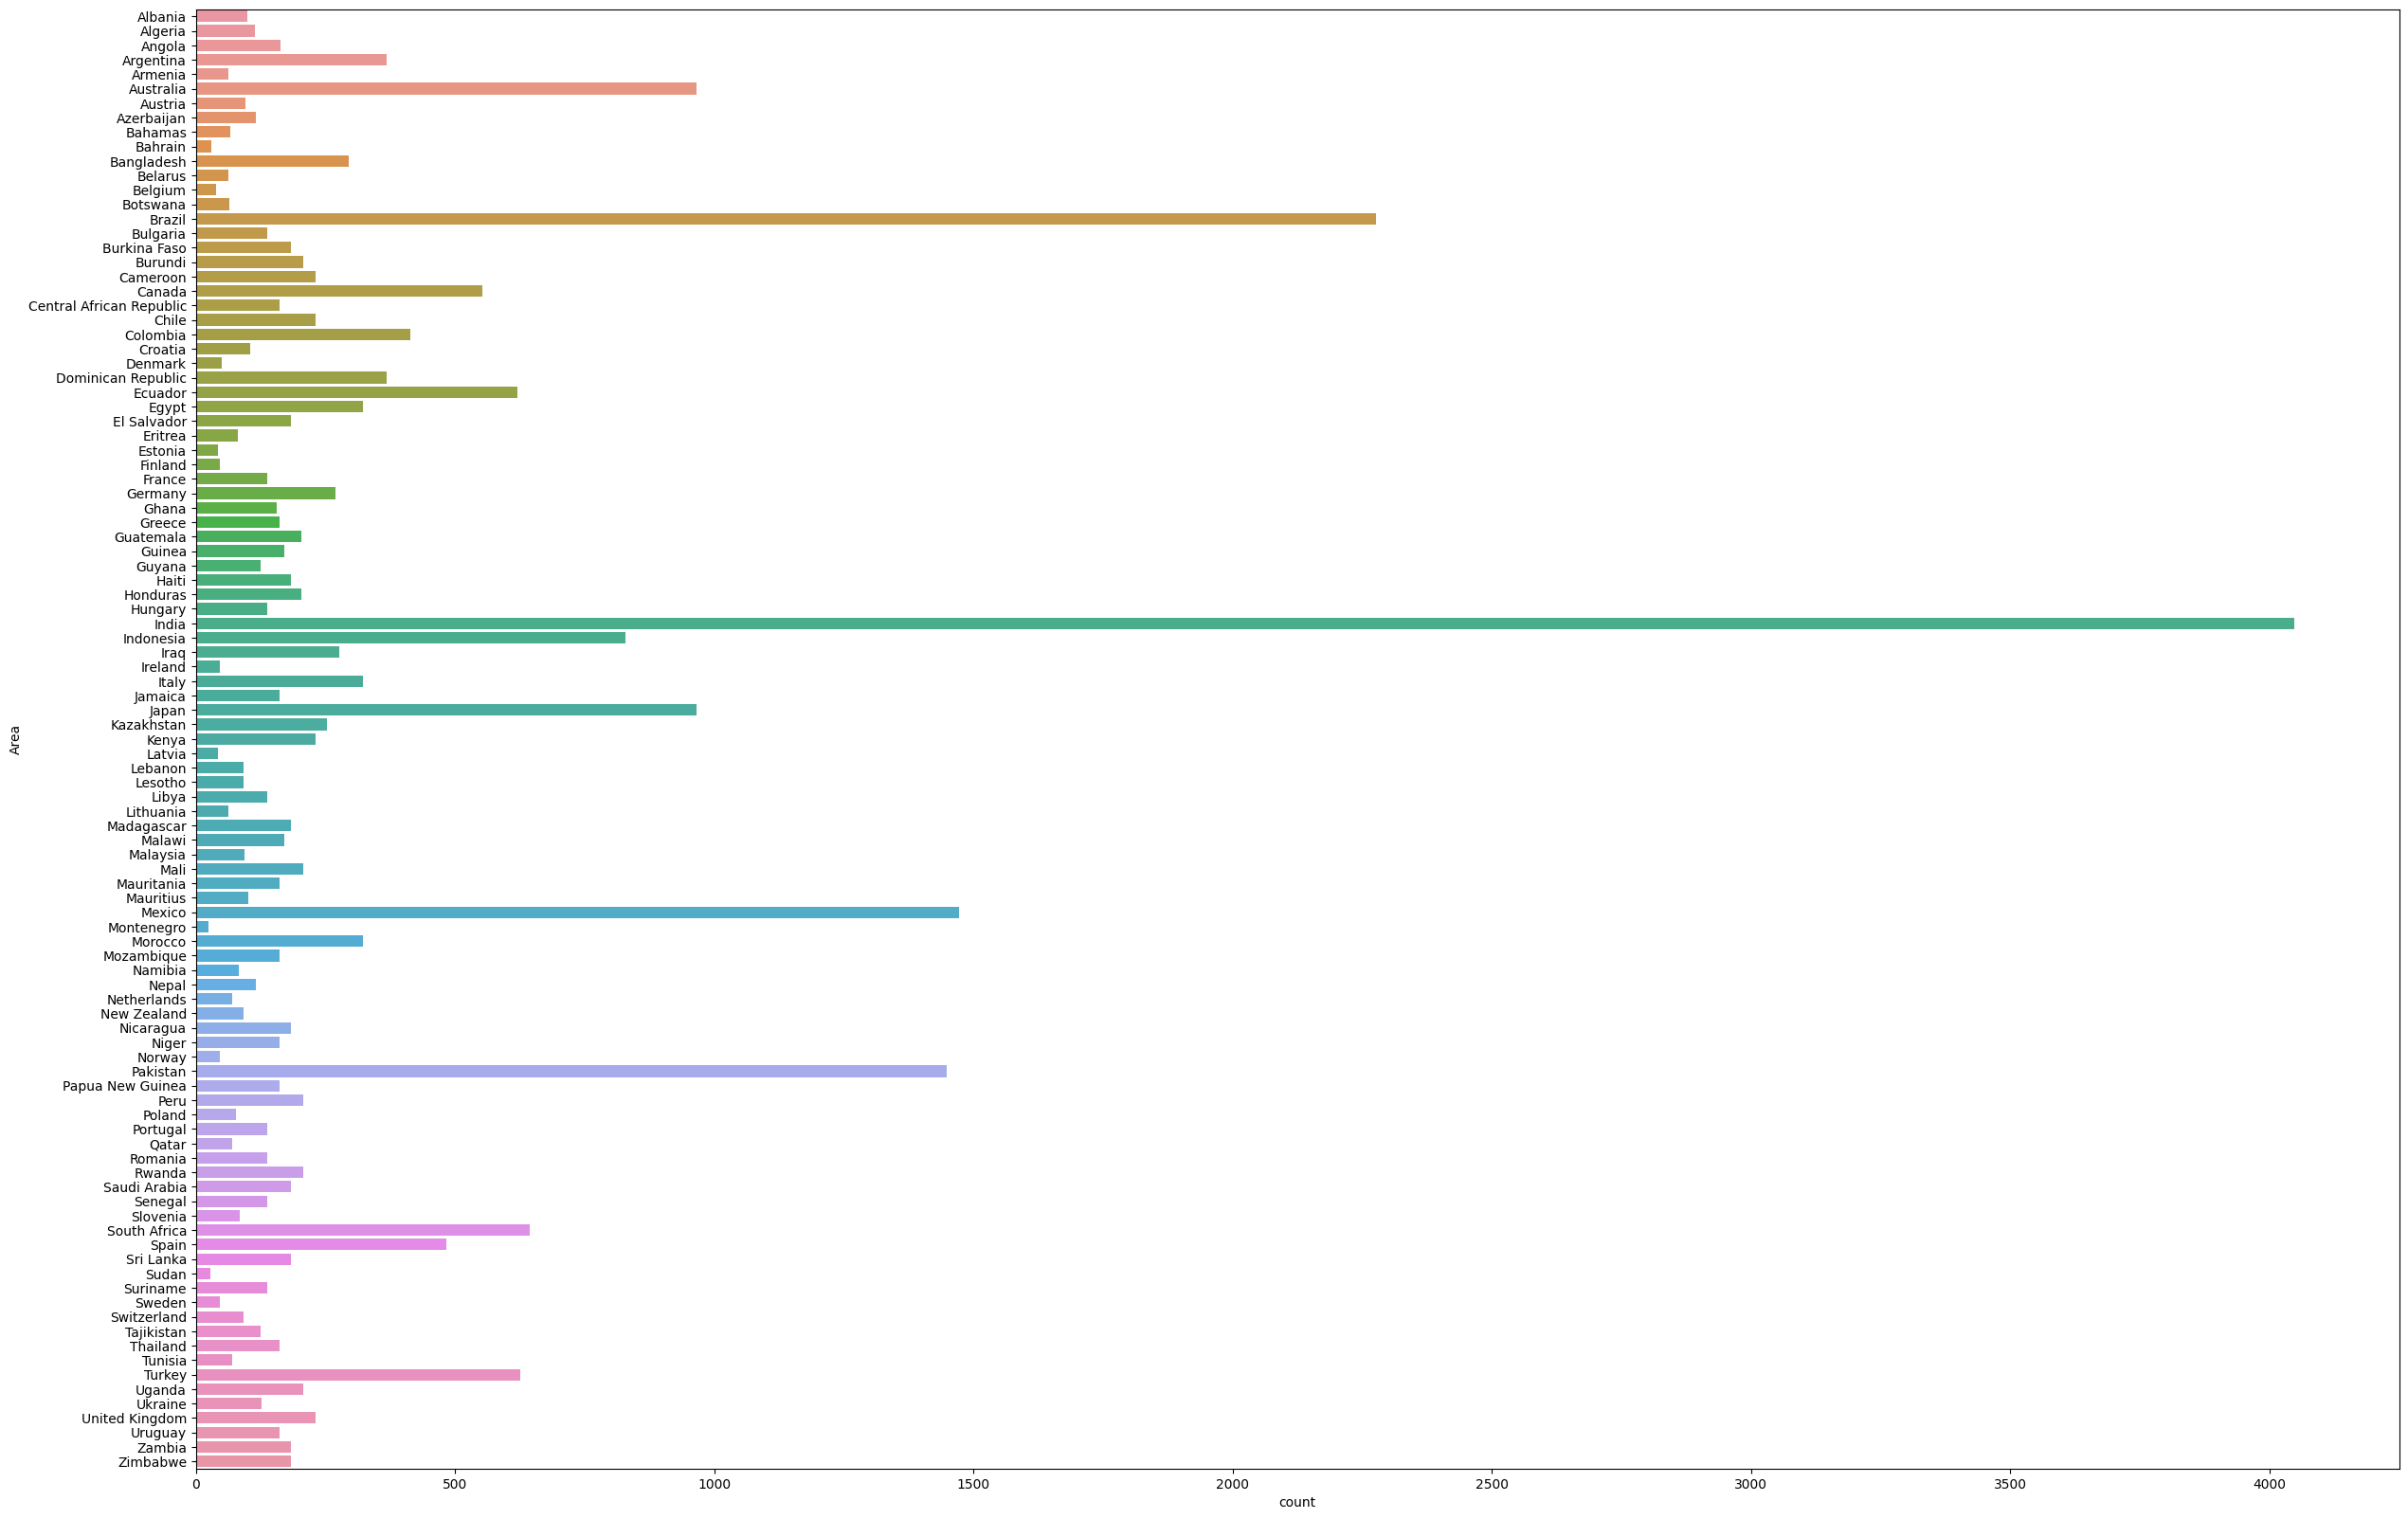

In [12]:
plt.figure(figsize = (30, 20))
sns.countplot(y="Area", data=cropData)
plt.show()

In [5]:
cropData.head()

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [6]:
print (cropData.columns)

Index(['Unnamed: 0', 'Area', 'Item', 'Year', 'hg/ha_yield',
       'average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp'],
      dtype='object')


Drop entire row that has a null value

In [4]:
cropData.dropna(axis=0)

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,Albania,Maize,1990,36613,1485.0,121.00,16.37
1,1,Albania,Potatoes,1990,66667,1485.0,121.00,16.37
2,2,Albania,"Rice, paddy",1990,23333,1485.0,121.00,16.37
3,3,Albania,Sorghum,1990,12500,1485.0,121.00,16.37
4,4,Albania,Soybeans,1990,7000,1485.0,121.00,16.37
...,...,...,...,...,...,...,...,...
28237,28237,Zimbabwe,"Rice, paddy",2013,22581,657.0,2550.07,19.76
28238,28238,Zimbabwe,Sorghum,2013,3066,657.0,2550.07,19.76
28239,28239,Zimbabwe,Soybeans,2013,13142,657.0,2550.07,19.76
28240,28240,Zimbabwe,Sweet potatoes,2013,22222,657.0,2550.07,19.76


Data visualization

In [17]:
# features = ['Area', 'Item', 'Year', 'average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp']
# X =  cropData[features]
# X.head()

In [8]:
# features = ['Area', 'Item', 'average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp']
# X =  cropData[features]
# X.head()

In [5]:
le = LabelEncoder()
for col in ['Area', 'Item']:
    cropData.loc[:, col] = le.fit_transform(cropData[col])

cropData.head()

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,0,1,1990,36613,1485.0,121.0,16.37
1,1,0,3,1990,66667,1485.0,121.0,16.37
2,2,0,4,1990,23333,1485.0,121.0,16.37
3,3,0,5,1990,12500,1485.0,121.0,16.37
4,4,0,6,1990,7000,1485.0,121.0,16.37


In [6]:
# A. Temporal Splitting (Year-Based)
data_sorted = cropData.sort_values(by='Year')

# Combine train and validation years
train_val_temp = data_sorted[data_sorted['Year'] <= 2011]  # Up to 2011 inclusive
test_temp = data_sorted[data_sorted['Year'] > 2011]
print(train_val_temp.head())
print("\n\n")
print(test_temp.head())

       Unnamed: 0 Area Item  Year  hg/ha_yield  average_rain_fall_mm_per_year  \
0               0    0    1  1990        36613                         1485.0   
14575       14575   43    6  1990        11149                         2702.0   
14576       14576   43    6  1990        11149                         2702.0   
14577       14577   43    6  1990        11149                         2702.0   
14578       14578   43    6  1990        11149                         2702.0   

       pesticides_tonnes  avg_temp  
0                  121.0     16.37  
14575             2432.0     27.05  
14576             2432.0     27.11  
14577             2432.0     27.18  
14578             2432.0     26.79  



       Unnamed: 0 Area Item  Year  hg/ha_yield  average_rain_fall_mm_per_year  \
14218       14218   42    0  2012       385818                         1083.0   
6900         6900   22    0  2012        96365                         3240.0   
6904         6904   22    2  2012        8088

In [7]:
# Split train_val into train and validation
# data before 2012
train_temp_X = train_val_temp.drop(['hg/ha_yield'], axis=1)
train_temp_y = train_val_temp['hg/ha_yield']

# datas after 2011
test_temp_X = test_temp.drop(['hg/ha_yield'], axis=1)
test_temp_y = test_temp['hg/ha_yield']

#Split the train_temp data into train and validation
train_temp_X, val_temp_X, train_temp_y, val_temp_y = train_test_split(train_temp_X, train_temp_y, test_size=0.2, random_state=42, shuffle = False) # shuffle=False is very important for time series data

eval_temp_X = test_temp_X #The test data is the evaluation data for temporal splitting
eval_temp_y = test_temp_y

In [14]:
# B. Spatial Splitting (Area-Based)
unique_areas = cropData['Area'].unique()

# Corrected spatial split
np.random.seed(42)
test_areas = np.random.choice(unique_areas, size=int(0.2 * len(unique_areas)), replace=False) # 20% for test
train_val_areas = np.setdiff1d(unique_areas, test_areas)

train_val_spatial = cropData[cropData['Area'].isin(train_val_areas)]
test_spatial = cropData[cropData['Area'].isin(test_areas)]

train_val_spatial_X = train_val_spatial.drop(['hg/ha_yield'], axis=1)
train_val_spatial_y = train_val_spatial['hg/ha_yield']

test_spatial_X = test_spatial.drop(['hg/ha_yield'], axis=1)
test_spatial_y = test_spatial['hg/ha_yield']

#Split the train_spatial data into train and validation
train_spatial_X, val_spatial_X, train_spatial_y, val_spatial_y = train_test_split(train_val_spatial_X, train_val_spatial_y, test_size=0.2, random_state=42)

eval_spatial_X = test_spatial_X #The test data is the evaluation data for spatial splitting
eval_spatial_y = test_spatial_y

In [9]:
# Scaling for Temporal Data
scaler_temp_X = StandardScaler()
train_temp_X_scaled = scaler_temp_X.fit_transform(train_temp_X)
val_temp_X_scaled = scaler_temp_X.transform(val_temp_X)  # Transform using the fitted scaler
test_temp_X_scaled = scaler_temp_X.transform(test_temp_X) # Transform using the fitted scaler
eval_temp_X_scaled = scaler_temp_X.transform(eval_temp_X) # Transform using the fitted scaler

# Convert back to DataFrames (optional but often useful)
train_temp_X_scaled = pd.DataFrame(train_temp_X_scaled, columns=train_temp_X.columns, index = train_temp_X.index)
val_temp_X_scaled = pd.DataFrame(val_temp_X_scaled, columns=val_temp_X.columns, index = val_temp_X.index)
test_temp_X_scaled = pd.DataFrame(test_temp_X_scaled, columns=test_temp_X.columns, index = test_temp_X.index)
eval_temp_X_scaled = pd.DataFrame(eval_temp_X_scaled, columns=eval_temp_X.columns, index = eval_temp_X.index)

In [17]:
# Scaling for Spatial Data
scaler_spatial_X = StandardScaler()
train_spatial_X_scaled = scaler_spatial_X.fit_transform(train_spatial_X)
val_spatial_X_scaled = scaler_spatial_X.transform(val_spatial_X)  # Transform using the fitted scaler
test_spatial_X_scaled = scaler_spatial_X.transform(test_spatial_X) # Transform using the fitted scaler
eval_spatial_X_scaled = scaler_spatial_X.transform(eval_spatial_X) # Transform using the fitted scaler

# Convert back to DataFrames (optional but often useful)
train_spatial_X_scaled = pd.DataFrame(train_spatial_X_scaled, columns=train_spatial_X.columns, index = train_spatial_X.index)
val_spatial_X_scaled = pd.DataFrame(val_spatial_X_scaled, columns=val_spatial_X.columns, index = val_spatial_X.index)
test_spatial_X_scaled = pd.DataFrame(test_spatial_X_scaled, columns=test_spatial_X.columns, index = test_spatial_X.index)
eval_spatial_X_scaled = pd.DataFrame(eval_spatial_X_scaled, columns=eval_spatial_X.columns, index = eval_spatial_X.index)

In [13]:
# Hyperparameter Tuning and Model Selection (Temporal Only)
param_grid = {'n_estimators': [20, 30, 50, 75, 100], 'max_depth': [10, 20, 30]}
grid_search_temp = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True, n_jobs=1)
grid_search_temp.fit(train_temp_X_scaled, train_temp_y)
best_rf_temp = grid_search_temp.best_estimator_


In [14]:
# Get cross-validation scores for the best model
cv_scores_temp = cross_val_score(best_rf_temp, train_temp_X_scaled, train_temp_y, cv=5, scoring='neg_mean_squared_error')

print("Cross-Validation Scores for Best Temporal Model:", cv_scores_temp)
print("Mean Cross-Validation Negative MSE for Best Temporal Model:", cv_scores_temp.mean())

# Evaluation on Test Set (Temporal Only)
predictions_temp = best_rf_temp.predict(test_temp_X_scaled)
mse_temp = mean_squared_error(test_temp_y, predictions_temp)
rmse_temp = np.sqrt(mse_temp)
mae_temp = mean_absolute_error(test_temp_y, predictions_temp)
r2_temp = r2_score(test_temp_y, predictions_temp)
print("\nTemporal Model Evaluation (Test Set):")
print(f"MSE: {mse_temp}, RMSE: {rmse_temp}, MAE: {mae_temp}, R-squared: {r2_temp}")

# Evaluation on Evaluation Set (Temporal Only)
predictions_eval_temp = best_rf_temp.predict(eval_temp_X_scaled)
mse_eval_temp = mean_squared_error(eval_temp_y, predictions_eval_temp)
rmse_eval_temp = np.sqrt(mse_eval_temp)
mae_eval_temp = mean_absolute_error(eval_temp_y, predictions_eval_temp)
r2_eval_temp = r2_score(eval_temp_y, predictions_eval_temp)
print("\nTemporal Model Evaluation (Evaluation Set):")
print(f"MSE: {mse_eval_temp}, RMSE: {rmse_eval_temp}, MAE: {mae_eval_temp}, R-squared: {r2_eval_temp}")

# Print the best parameters
print(f"Best parameters: {grid_search_temp.best_params_}")

#Print the train scores for the best model
print(f"Train scores: {grid_search_temp.cv_results_['mean_train_score'][grid_search_temp.best_index_]}")


Cross-Validation Scores for Best Temporal Model: [-2.31675021e+08 -1.28471250e+08 -1.73576365e+08 -2.81436335e+08
 -8.73177676e+08]
Mean Cross-Validation Negative MSE for Best Temporal Model: -337667329.2936924

Temporal Model Evaluation (Test Set):
MSE: 739831393.7292014, RMSE: 27199.84179603259, MAE: 14616.492612941642, R-squared: 0.9199418332192877

Temporal Model Evaluation (Evaluation Set):
MSE: 739831393.7292014, RMSE: 27199.84179603259, MAE: 14616.492612941642, R-squared: 0.9199418332192877
Best parameters: {'max_depth': 30, 'n_estimators': 50}
Train scores: -11096421.64843919


In [24]:
# results = {}

working for Random Forest Regressor using cross val score

In [19]:
score = cross_val_score(RandomForestRegressor(), train_temp_X_scaled, train_temp_y, cv = 5,  scoring="r2", fit_params=True)
print (f"RandomForest Scores: {score}")
print(score.mean())

RandomForest Scores: [0.95495625 0.97790024 0.97266842 0.96308687 0.88625717]
0.9509737892594089


Tuning Random Forest by changing the number of estimators to different values and observing the r2 score.

In [ ]:
estimators = [10, 20, 30, 50, 100]

for count in estimators:
    score = cross_val_score(RandomForestRegressor(n_estimators= count, random_state= 42), train_temp_X_scaled, train_temp_y, cv= 5, scoring="r2")
    print(f'For estimators: {count}: {score}')
    print(f'Score Mean: {score.mean()}')

In [27]:
model = RandomForestRegressor(n_estimators=50, random_state=42)
model.fit(train_temp_X_scaled, train_temp_y)
predictions = model.predict(test_temp_X_scaled)
print(predictions)

mse = mean_squared_error(test_temp_y, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(test_temp_y, predictions)
r2 = r2_score(test_temp_y, predictions)
residuals = test_temp_y - predictions

print(f" MSE: {mse}\n RMSE: {rmse}\n MAE: {mae}\n R-Squared: {r2}\n")
print(residuals)

[ 69687.06   21197.124  38363.744 ... 245277.     25100.272  17690.484]
 MSE: 462576085.67897105
 RMSE: 21507.582050964516
 MAE: 9260.045259757191
 R-Squared: 0.9362287007825927

25564     -467.060
18113    -1197.124
25607    12842.256
6815      9850.548
18144    -3978.184
           ...    
25027     3363.744
5508     11900.784
11393     7498.000
16688     -485.272
3877      5496.516
Name: hg/ha_yield, Length: 5649, dtype: float64


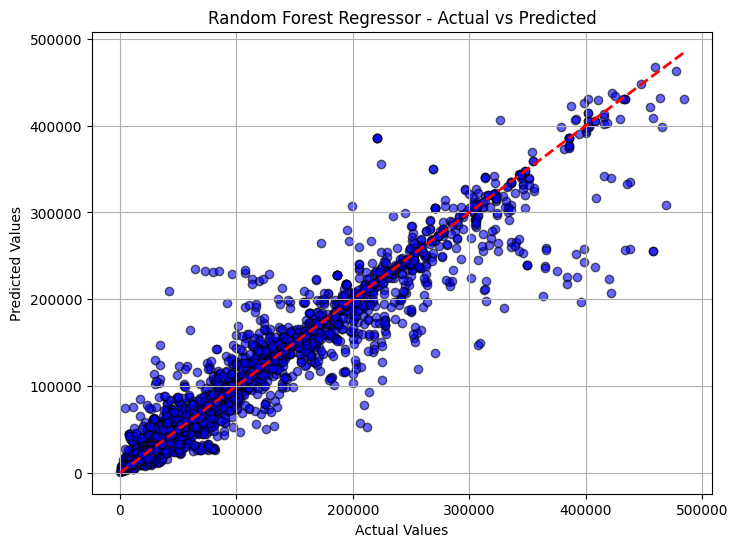

In [28]:
# plot Actual vs Predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions, color='blue', edgecolor='k', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2, ls='--')
plt.title(f'Random Forest Regressor - Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()

Residuals for Random Forest Regressor:

25564     -467.060
18113    -1197.124
25607    12842.256
6815      9850.548
18144    -3978.184
           ...    
25027     3363.744
5508     11900.784
11393     7498.000
16688     -485.272
3877      5496.516
Name: hg/ha_yield, Length: 5649, dtype: float64




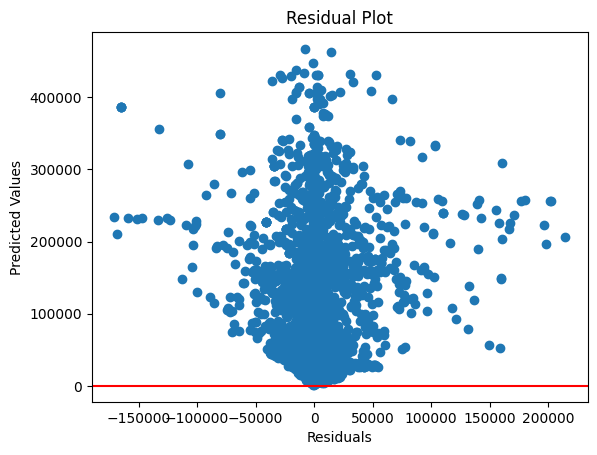

In [29]:
print(f"Residuals for Random Forest Regressor:\n")
print(residuals)
print("\n")
plt.scatter(residuals, predictions)
plt.xlabel('Residuals')
plt.ylabel('Predicted Values')
plt.title('Residual Plot')
plt.axhline(y=0, color='r', linestyle='-')
plt.show()

Tuning SVM

In [37]:
svm = SVR()
svm.fit(X_train_scaled, y_train)
predictions = svm.predict(X_test_scaled)
r2 = r2_score(y_test, predictions)
print(f"R-squared value for svm with default parameters: {r2}")

R-squared value for svm with default parameters: -0.20179609535426435


In [ ]:
# svm = SVR()
# param_grid = {'C': [0.1, 1],
#               'gamma': [1, 0.1],
#               'kernel': ['rbf','linear']}
# grid = GridSearchCV(svm,param_grid)

svm = SVR()
param_grid = {'C': [0.1, 1],
              'gamma': [1, 0.1],
              'kernel': ['rbf', 'linear']}

grid_search = GridSearchCV(svm, param_grid, cv=5, scoring="neg_mean_squared_error")  

grid_search.fit(X_train_scaled, y_train)

best_svm = grid_search.best_estimator_

best_svm.fit(X_train_scaled, y_train)

predictions = best_svm.predict(X_test_scaled)

mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
residuals = y_test - predictions

print(f" MSE: {mse}\n RMSE: {rmse}\n MAE: {mae}\n R-Squared: {r2}\n")
print(residuals)

In [36]:
grid.fit(X_train_scaled,y_train)

In [32]:
predictions = grid.predict(X_test_scaled)
print(predictions)

[38730.07103343 34162.3208298  37673.35365212 ... 42389.40923277
 46301.32291359 38306.96543736]


In [33]:
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
residuals = y_test - predictions

print("Support Vector Machines\n")
print(f" MSE: {mse}\n RMSE: {rmse}\n MAE: {mae}\n R-Squared: {r2}\n")
print(residuals)

Support Vector Machines

 MSE: 8599303710.634243
 RMSE: 92732.43073830343
 MAE: 56536.72845611298
 R-Squared: -0.18551042081496782

25564     30489.928967
18113    -14162.320830
25607     13532.646348
6815     124855.228424
18144     20859.977964
             ...      
25027     -1788.721126
5508      97083.533211
11393    210385.590767
16688    -21686.322914
3877     -15119.965437
Name: hg/ha_yield, Length: 5649, dtype: float64


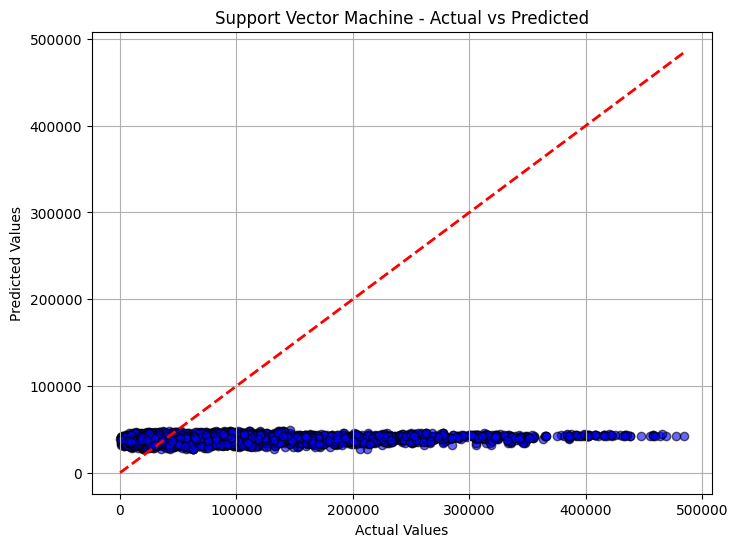

In [34]:
# plot Actual vs Predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions, color='blue', edgecolor='k', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2, ls='--')
plt.title(f'Support Vector Machine - Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()

Residuals for Support Vector Machine:

25564     30489.928967
18113    -14162.320830
25607     13532.646348
6815     124855.228424
18144     20859.977964
             ...      
25027     -1788.721126
5508      97083.533211
11393    210385.590767
16688    -21686.322914
3877     -15119.965437
Name: hg/ha_yield, Length: 5649, dtype: float64




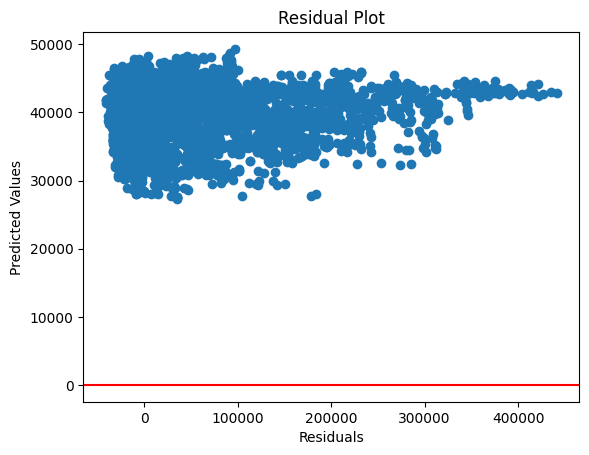

In [35]:
print(f"Residuals for Support Vector Machine:\n")
print(residuals)
print("\n")
plt.scatter(residuals, predictions)
plt.xlabel('Residuals')
plt.ylabel('Predicted Values')
plt.title('Residual Plot')
plt.axhline(y=0, color='r', linestyle='-')
plt.show()